In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from case1_rk4 import rk_defect_control_perfect_first_step,  rk_defect_control_static_alpha_beta, rk_defect_control_perfect_first_step_smooth

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    # (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step_smooth(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha_beta(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    # ====================================== figure of defect shape

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()
    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999996, 0.5000000000000002, 1.0000000000000009, 0.49999999999999956, 0.9999999999999981, 0.5000000000000004]
beta values [0.9999999999999991, 1.0000000000000004, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 1.9999999999999991, 2.0000000000000018, 1.0000000000000018, 1.9999999999999982]
n_steps 32
n_successful_steps 26

integration complete


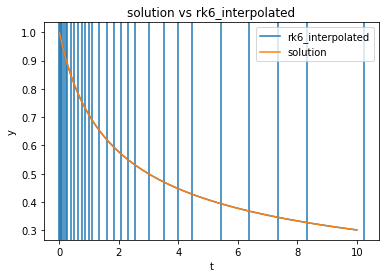

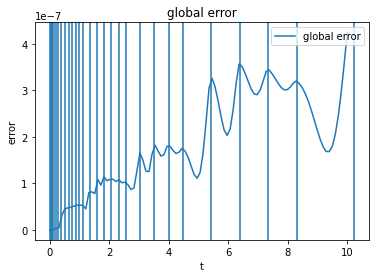

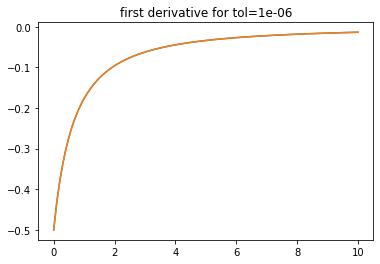

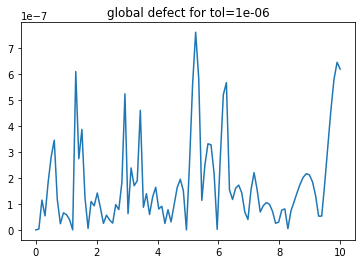

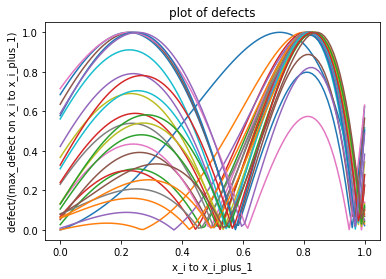

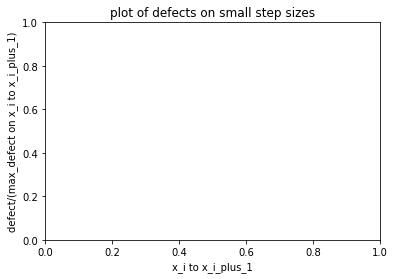

0.0
0.0
0.0
9.96265292485532e-11
2.5197920416886177e-09
4.166520795045869e-09
5.275856085340536e-09
3.244876478625258e-08
4.628678673679332e-08
5.282234627479454e-08
5.5281256017281066e-08
5.5448101665689364e-08
5.4336978694280447e-08
5.2535848116264106e-08
9.428812219880456e-08
1.1056590620839302e-07
1.1464691851426068e-07
1.1285325740573171e-07
1.0831327657001566e-07
1.0261478133877233e-07
1.6591265011856038e-07
1.8409230001514842e-07
1.8342760960132765e-07
1.750522756749362e-07
3.2823432716266865e-07
3.578927551539657e-07
3.453086525606608e-07
3.1943766803932405e-07
5.093887859297652e-07


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.9999999999999991, 1.0, 2.0, 0.5, 1.0000000000000038, 0.9999999999999963, 0.5000000000000009, 0.9999999999999981]
beta values [0.5, 1.0, 2.0, 2.000000000000001, 1.0000000000000009, 1.9999999999999982, 1.9999999999999962, 0.9999999999999963, 2.0000000000000075, 1.0000000000000038, 1.0000000000000018]
n_steps 120
n_successful_steps 81

integration complete


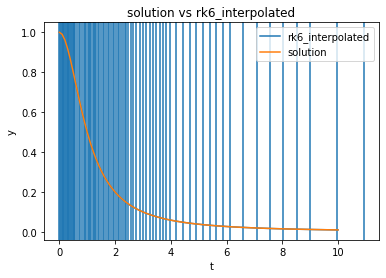

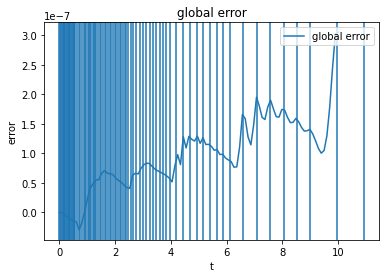

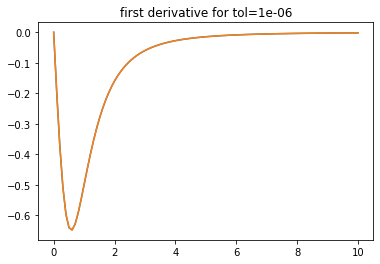

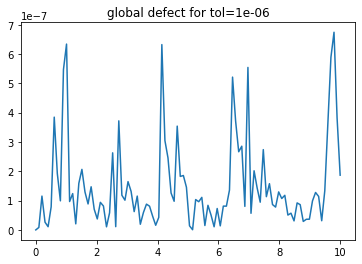

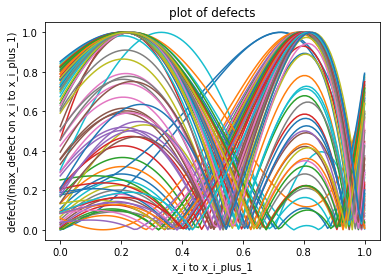

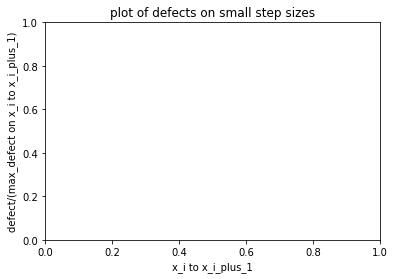

0.0
0.0
0.0
5.771746414140466e-10
1.3705131474139876e-09
2.3519237668523374e-09
3.486278044029234e-09
4.7330713792703705e-09
6.048350043030837e-09
7.3867847394382125e-09
8.703751830374529e-09
9.957287994133424e-09
1.110979075402696e-08
1.212937206229725e-08
1.2990797881862193e-08
1.3675992671657866e-08
1.4174119877807811e-08
1.4481283727718619e-08
1.4599918940483292e-08
1.4537951065207722e-08
2.8547041286408614e-08
3.186955432887828e-08
2.6965909505349828e-08
1.6401220381823123e-08
2.5152040450393542e-09
1.2760147161117175e-08
1.2539235205721866e-08
2.8195642209905003e-08
2.7102258326472395e-08
4.121257918265897e-08
3.935521020181909e-08
5.101595623724364e-08
4.857799273949581e-08
5.756907023313218e-08
5.4748861333386856e-08
6.124237239557573e-08
6.584507666884676e-08
6.883770875543149e-08
7.048785782837186e-08
7.104036736649277e-08
7.071266849845159e-08
6.969343771534575e-08
6.81433686977595e-08
6.619718237454997e-08
6.396627000304633e-08
6.154156620419293e-08
5.899639846096427e-08
5.

In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000009, 0.9999999999999981, 2.0]
beta values [0.9999999999999991, 1.0, 2.0, 2.0000000000000004, 1.9999999999999991, 1.9999999999999996, 2.0000000000000018, 1.0000000000000018, 1.9999999999999982, 0.5, 1.9999999999999962]
n_steps 62
n_successful_steps 37

integration complete


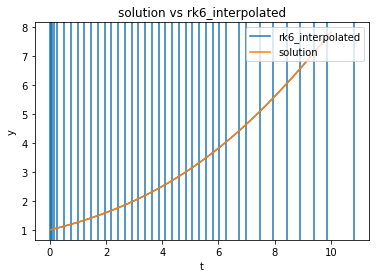

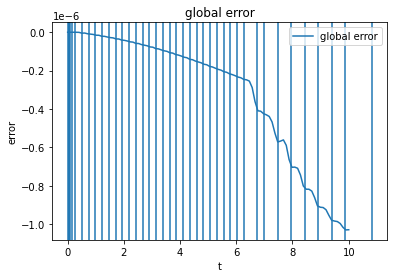

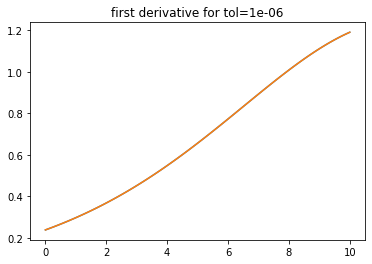

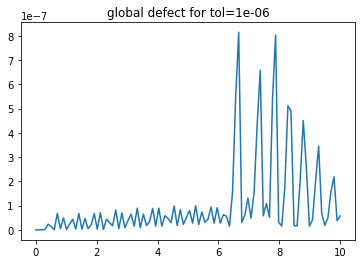

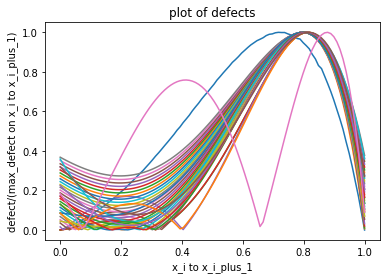

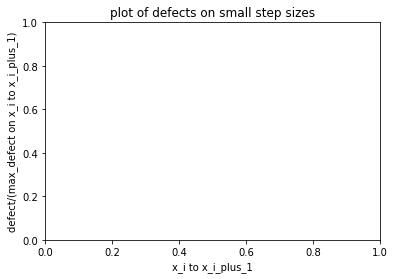

0.0
0.0
0.0
1.389999226830696e-13
4.603650793910674e-12
1.4872880704785985e-10
4.8389789952807405e-09
9.939066014652553e-09
1.5464020508559884e-08
2.142771138302635e-08
2.7842595784477453e-08
3.47194537564377e-08
4.206711046172984e-08
4.989214930084529e-08
5.8198617702842625e-08
6.698773247215684e-08
7.625758513540859e-08
8.600285772430993e-08
9.62145527694247e-08
1.0687974105749731e-07
1.1798134247342773e-07
1.2949793815053567e-07
1.4140362614156743e-07
1.536679290481402e-07
1.6625575938178372e-07
1.7912744754156051e-07
1.922388381814244e-07
2.055414665136368e-07
2.1898280788690272e-07
2.3250660241558307e-07
2.4605326931492755e-07
4.087145262232639e-07
4.2647209674839814e-07
5.715295401387266e-07
7.024071635441942e-07
8.156886890375858e-07
9.087698078502626e-07
9.800418769856378e-07
1.0290126599699079e-06
1.0122201139495246e-06


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.5, 1.0, 2.0000000000000147, 0.4999999999999963, 0.9999999999999852, 1.0000000000000295, 0.9999999999999408, 2.0, 0.5000000000000296, 1.9999999999998817, 15.999999999999986]
beta values [0.5, 1.0, 0.06250000000000006, 0.2500000000000002, 0.1250000000000001, 2.0, 0.4999999999999963, 2.0000000000000147, 1.0000000000000149, 1.9999999999999705, 0.9999999999999704, 2.000000000000059, 1.0000000000000593, 1.9999999999998817, 0.5000000000000296]
n_steps 7043
n_successful_steps 4969

integration complete


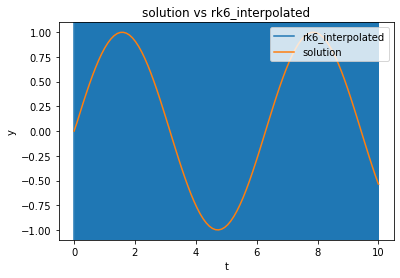

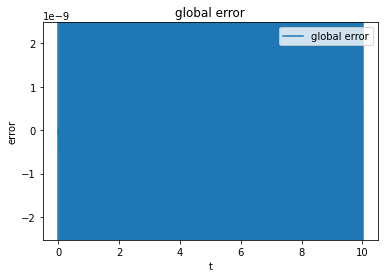

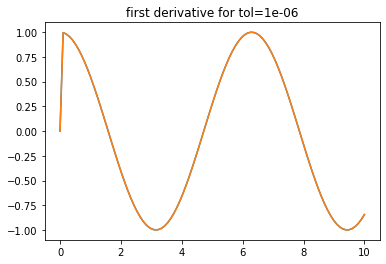

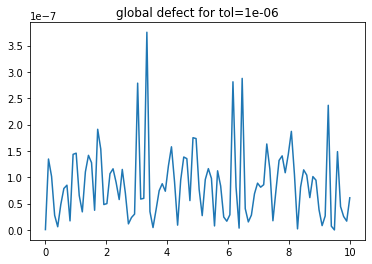

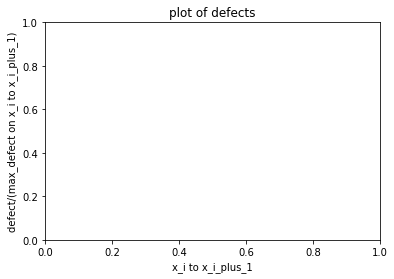

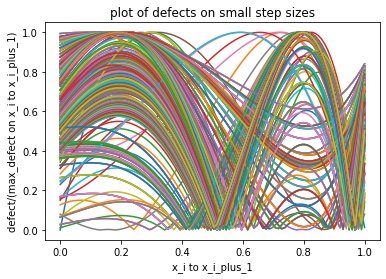

0.0
0.0
0.0
3.770371514999482e-11
6.070345615061257e-11
7.31528379538382e-10
8.622577513106577e-10
7.185950445798284e-10
4.5288929551023926e-10
1.4904505407642432e-10
1.4956991201131586e-10
4.229776529030005e-10
6.642029704018171e-10
8.730949713209313e-10
1.052741380180855e-09
1.2074578698006988e-09
1.3417181254915533e-09
1.4596330394356372e-09
1.5647401152563134e-09
1.6599599889088879e-09
1.7476362440538296e-09
1.8296106990556282e-09
1.907307922710544e-09
1.9818159890938603e-09
2.053957615100188e-09
2.12434944635298e-09
2.193450726606372e-09
2.261601045328021e-09
2.3290502582096195e-09
2.395981441027928e-09
2.462527903812628e-09
2.5287865690337696e-09
2.594827464008631e-09
2.6607009095958034e-09
2.2338159100243615e-09
2.443251129191637e-09
2.0545017076489813e-09
2.3506567525810595e-09
1.978695512994122e-09
2.3291758244337046e-09
1.9618435209700635e-09
2.3481845634609755e-09
1.9785577065611903e-09
2.3902323731395114e-09
2.0143710033337925e-09
2.44537476379314e-09
2.061039006129306e-09


In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.5, 1.0, 2.0, 3.9999999999999964, 2.0000000000000147, 0.4999999999999963, 0.9999999999999852, 0.5000000000000074, 2.000000000000059, 0.4999999999999852, 1.9999999999999705, 1.0000000000000295, 1.9999999999998817, 0.9999999999999408, 0.5000000000000296]
beta values [0.5, 1.0, 2.0, 1.9999999999999982, 0.2500000000000002, 0.4999999999999963, 2.0000000000000147, 1.0000000000000149, 1.9999999999999705, 0.4999999999999852, 2.000000000000059, 0.9999999999999704, 0.5000000000000296, 1.9999999999998817, 1.0000000000000593, 0.5000000000000074]
n_steps 2096
n_successful_steps 1598

integration complete


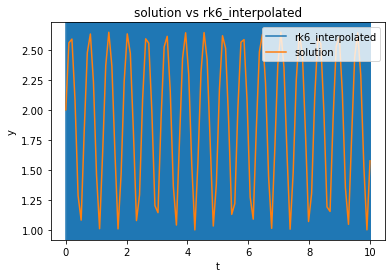

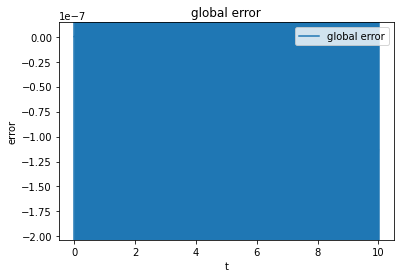

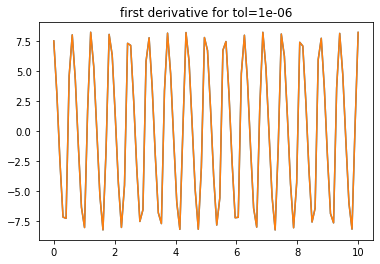

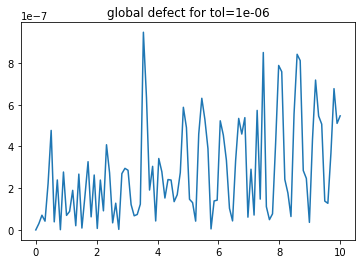

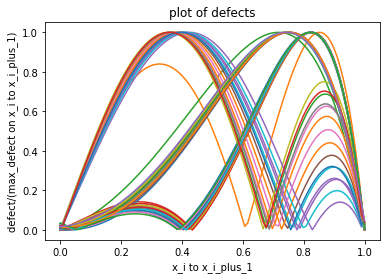

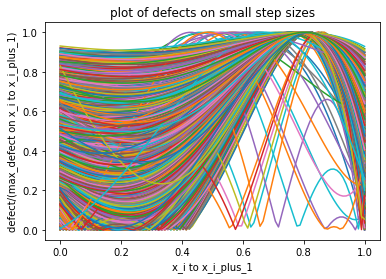

0.0
0.0
0.0
6.522489215399219e-10
1.262388416023441e-09
1.8272983126621511e-09
2.344322069802729e-09
2.811212596043333e-09
3.2260807358852617e-09
3.587354857614855e-09
3.89374088527461e-09
4.14419387695375e-09
4.337889603078793e-09
7.907945853702358e-09
7.449433514494785e-09
2.958137290676177e-09
2.7412587755293316e-09
2.465845749810569e-09
2.132631404805352e-09
1.7425443310514765e-09
1.2967316109779858e-09
7.965819115440809e-10
2.437565704838107e-10
3.5977354428951003e-10
1.011690731189674e-09
1.7092824933229167e-09
2.449398461834562e-09
3.228402434274358e-09
4.042137735638107e-09
4.885906790264016e-09
5.754488885401088e-09
6.642223659980573e-09
7.543202062976206e-09
8.451638722206667e-09
9.362537189971931e-09
1.0272807049460653e-08
1.118308934344725e-08
1.2100656920921438e-08
1.304390240264297e-08
1.4049140295568918e-08
1.518060077643213e-08
1.654459658162466e-08
1.830856266593628e-08
2.0724551630380006e-08
2.1238589553718157e-08
2.1783037151834606e-08
2.2361090534772643e-08
2.297614

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000004, 0.9999999999999996, 0.5000000000000002]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.9999999999999996, 1.0000000000000004, 1.9999999999999991]
n_steps 26
n_successful_steps 21

integration complete


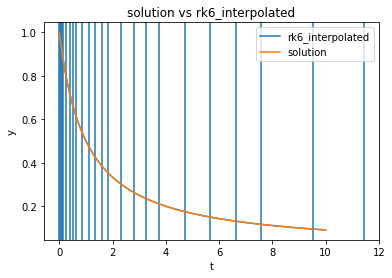

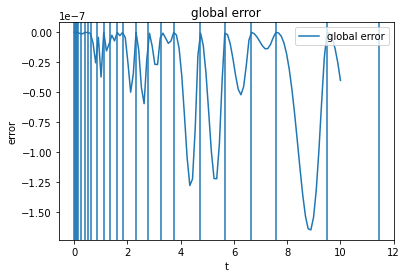

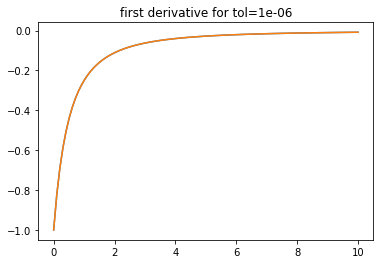

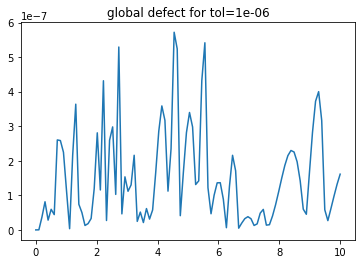

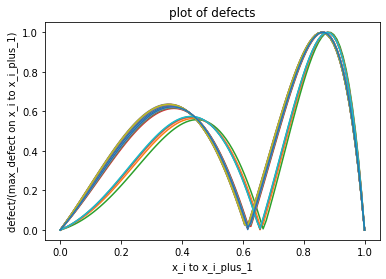

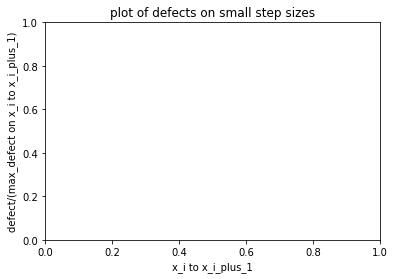

0.0
0.0
0.0
0.0
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
1.6653345369377348e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
5.551115123125783e-17
5.551115123125783e-17
2.7755575615628914e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
2.7755575615628914e-17
4.163336342344337e-17
2.7755575615628914e-17


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000009, 0.9999999999999981, 0.5000000000000009, 2.0, 1.0000000000000073, 0.4999999999999963, 2.0000000000000147]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 1.9999999999999991, 0.9999999999999991, 2.0000000000000018, 1.0000000000000018, 1.9999999999999982, 1.9999999999999962, 0.5, 0.9999999999999926, 2.0000000000000147, 0.4999999999999963, 1.9999999999999927]
n_steps 122
n_successful_steps 69

integration complete


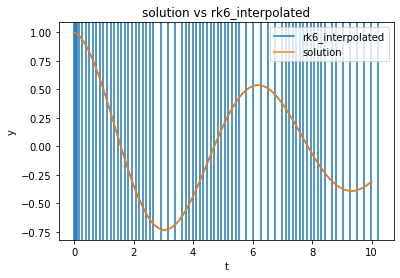

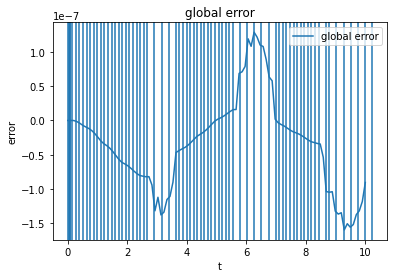

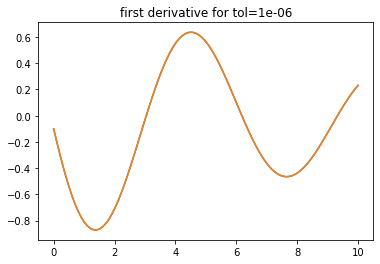

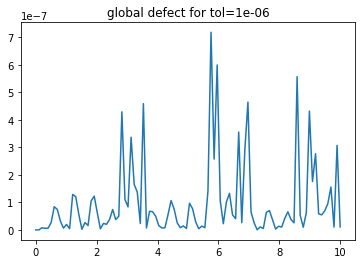

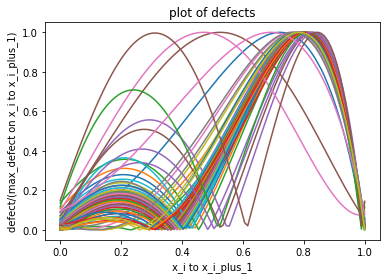

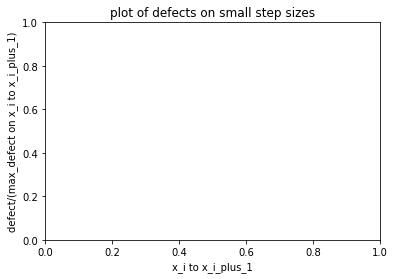

0.0
0.0
0.0
7.923661726749742e-13
3.549571747640812e-11
1.7269644603246093e-09
4.142701959253259e-09
7.221445552652028e-09
1.0893980273429804e-08
1.5084321236535914e-08
1.971096275088513e-08
2.4688177613363393e-08
2.99273469339667e-08
3.533829856516846e-08
4.0830638287081555e-08
4.63150502533205e-08
5.170455241731986e-08
5.6915688606551385e-08
6.186964143783946e-08
6.649325268170969e-08
7.071993746166072e-08
7.449048339269737e-08
7.775372445895101e-08
8.046708344089382e-08
8.259697781287656e-08
8.411908802852253e-08
1.3309366730940297e-07
1.414037692493153e-07
1.1121692555793317e-07
4.675785525432019e-08
4.35340725690736e-08
3.992911268291266e-08
3.600176373685926e-08
3.181407098873379e-08
2.7430368421121898e-08
2.291630138429035e-08
1.8337852347727335e-08
1.3760385969563416e-08
9.24772511215824e-09
4.86127109400325e-09
6.5917951652672e-10
3.3043978109326133e-09
6.979995248457271e-09
1.032343277529435e-08
1.3296324818945493e-08
1.5866493952021443e-08
8.321026517821295e-08
1.21047760703

In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.9999999999999991, 1.0, 2.0, 0.5, 1.0000000000000038, 0.9999999999999963, 0.5000000000000009, 0.9999999999999981]
beta values [0.5, 1.0, 2.0, 0.9999999999999963, 1.0000000000000009, 1.0000000000000038, 1.9999999999999962, 1.0000000000000018]
n_steps 129
n_successful_steps 93

integration complete


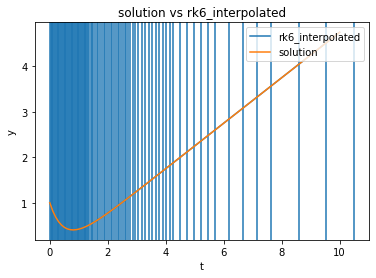

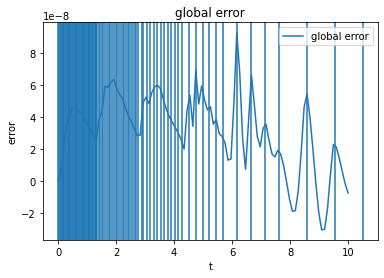

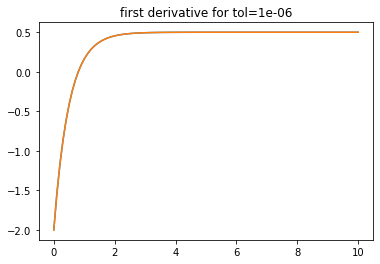

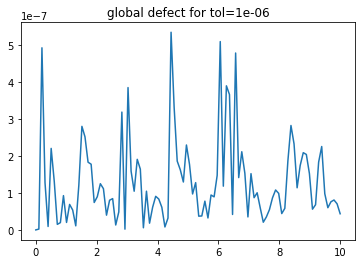

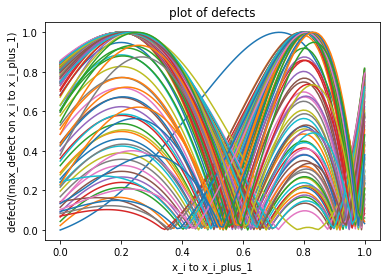

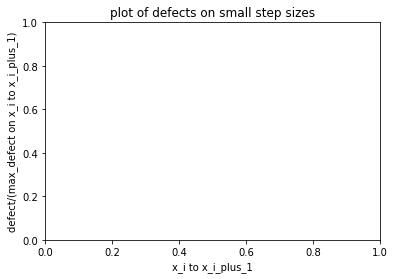

0.0
0.0
0.0
7.112826105881709e-09
1.3397214893018372e-08
1.8925532918601107e-08
2.3764527679048797e-08
2.7975736616170366e-08
3.161586792366222e-08
3.473715370905239e-08
3.738767939687193e-08
3.9611689373053593e-08
4.144987142407075e-08
4.2939620970017245e-08
4.411528614634008e-08
4.5008396343249046e-08
4.5647873925247495e-08
4.6060230907141175e-08
4.626975147470347e-08
4.629866179328701e-08
4.616728704887052e-08
4.58941978309646e-08
4.549634519124268e-08
4.498918670936547e-08
4.4386802455775864e-08
4.370200357151077e-08
4.294643179969526e-08
4.213065257774318e-08
4.126424063555234e-08
4.035585993156232e-08
3.941333687196291e-08
3.8443728755943596e-08
3.745338666982789e-08
3.6448013718271e-08
3.5432719258654544e-08
3.441206836152233e-08
3.339012821790277e-08
3.237051038329497e-08
3.13564100795638e-08
3.035064266576626e-08
2.9355676722797597e-08
2.837366519514717e-08
2.740647347954095e-08
2.6455705903760673e-08
2.5522729651950016e-08
2.4608696969075083e-08
3.8903120946898184e-08
3.71156

In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)